In [1]:
import numpy as np
import pandas as pd

In [6]:
import json
import string

In [3]:
imp_w = open('important_words.json','r')
important_words = json.loads(imp_w.read())

In [14]:
products = pd.read_csv('amazon_baby_subset.csv')
products['review'] = products['review'].astype(str)

In [15]:
products.head(1)

,name,review,rating,sentiment
0,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,1


In [16]:
def remove_punctuation(review):
    review = review.lower()
    translator = str.maketrans('','',string.punctuation)
    return review.translate(translator)

In [17]:
products['clean_review'] = products['review'].apply(remove_punctuation)

In [20]:
for word in important_words:
    products[word] = products['clean_review'].apply(lambda a:a.split().count(word))

In [22]:
train = open('module-4-assignment-train-idx.json','r')
train_ID = json.loads(train.read())
valid = open('module-4-assignment-validation-idx.json','r')
valid_ID = json.loads(valid.read())

In [23]:
train_data = products.iloc[train_ID]
valid_data = products.iloc[valid_ID]

In [89]:
products = products.fillna({'review':'','clean_review':''})

In [246]:
def to_numpy_array(dataframe,features,sentiment_label):
    dataframe['constant'] =1
    features = ['constant'] + features
    feature_matrix = dataframe[features].as_matrix()
    sentiment = dataframe[sentiment_label].as_matrix()
    
    
    return  feature_matrix,sentiment

In [247]:
train_matrix,train_sentiment = to_numpy_array(train_data,important_words,'sentiment')

In [248]:
valid_matrix,valid_sentiment = to_numpy_array(valid_data,important_words,'sentiment')

In [93]:
def sigmoid(feature_matrix,co_effs):
    
    predict_prob = 1/(1+np.exp(-np.dot(feature_matrix,co_effs)))
    return predict_prob

In [94]:
def feature_derivative(feature,error,l2_penalty,co_eff,is_constant):
    
    if is_constant == True:
        derivative = np.dot(feature,error)
        
    else:
        derivative = np.dot(feature,error)- 2 * l2_penalty*co_eff
        
    return derivative
    

In [103]:
def compute_log_likelihood(feature_matrix,sentiment,co_effs,l2_penalty):
    indicator = (sentiment== +1)
    score = np.dot(feature_matrix,co_effs)
    log_likelhood = np.sum((indicator-1)*score-np.log(1+np.exp(-score))) - l2_penalty*np.sum(co_effs[1:]**2)
    
    return log_likelhood

In [120]:
def logistic_regression_with_L2(feature_matrix,sentiment,initial_coeff,l2_penalty,step_size,max_iter):
    
    co_effs = np.array(initial_coeff)
    derivative = np.zeros(co_effs.shape)
    for itr in range(max_iter):
        
        prediction = sigmoid(feature_matrix,co_effs)
        indicator = (sentiment == +1)
        error = indicator - prediction

        for j in range(len(co_effs)):
            is_constant = (j==0)
            derivative[j] = feature_derivative(feature_matrix[:,j],error,l2_penalty,co_effs[j],is_constant)
            
        co_effs = co_effs + step_size * derivative
        if (itr<=15) or (itr<=100 and itr%10==0) or (itr<=1000 and itr%100 == 0):
            
            log_likelihood = compute_log_likelihood(feature_matrix,sentiment,co_effs,l2_penalty)

            print('iteration %d: log likelihood = %.8f' %(itr, log_likelihood))
            
    return co_effs         

In [121]:
co_efficients_0_penalty = logistic_regression_with_L2(feature_matrix=train_matrix,sentiment=train_sentiment,
                                            initial_coeff= np.zeros(train_matrix.shape[1]),l2_penalty=0,step_size=5e-6,max_iter=501)

iteration 0: log likelihood = -29140.90494121
iteration 1: log likelihood = -28928.71848005
iteration 2: log likelihood = -28725.05245713
iteration 3: log likelihood = -28529.28381570
iteration 4: log likelihood = -28340.89899298
iteration 5: log likelihood = -28159.45740073
iteration 6: log likelihood = -27984.56959298
iteration 7: log likelihood = -27815.88382176
iteration 8: log likelihood = -27653.07759417
iteration 9: log likelihood = -27495.85227091
iteration 10: log likelihood = -27343.92951289
iteration 11: log likelihood = -27197.04884240
iteration 12: log likelihood = -27054.96587260
iteration 13: log likelihood = -26917.45094013
iteration 14: log likelihood = -26784.28798544
iteration 15: log likelihood = -26655.27359157
iteration 20: log likelihood = -26066.09388365
iteration 30: log likelihood = -25109.92556285
iteration 40: log likelihood = -24365.32456678
iteration 50: log likelihood = -23766.96630701
iteration 60: log likelihood = -23274.01377467
iteration 70: log likel

In [122]:
co_efficients_4_penalty = logistic_regression_with_L2(feature_matrix=train_matrix,sentiment=train_sentiment,
                                            initial_coeff= np.zeros(train_matrix.shape[1]),l2_penalty=4,step_size=5e-6,max_iter=501)

iteration 0: log likelihood = -29140.90941977
iteration 1: log likelihood = -28928.74458068
iteration 2: log likelihood = -28725.11591598
iteration 3: log likelihood = -28529.39913058
iteration 4: log likelihood = -28341.07954921
iteration 5: log likelihood = -28159.71557184
iteration 6: log likelihood = -27984.91682598
iteration 7: log likelihood = -27816.33071233
iteration 8: log likelihood = -27653.63395455
iteration 9: log likelihood = -27496.52719189
iteration 10: log likelihood = -27344.73142075
iteration 11: log likelihood = -27197.98555108
iteration 12: log likelihood = -27056.04463167
iteration 13: log likelihood = -26918.67847871
iteration 14: log likelihood = -26785.67055243
iteration 15: log likelihood = -26656.81699246
iteration 20: log likelihood = -26068.51522321
iteration 30: log likelihood = -25114.35933883
iteration 40: log likelihood = -24371.96216461
iteration 50: log likelihood = -23775.89670638
iteration 60: log likelihood = -23285.27045766
iteration 70: log likel

In [123]:
co_efficients_10_penalty = logistic_regression_with_L2(feature_matrix=train_matrix,sentiment=train_sentiment,
                                            initial_coeff= np.zeros(train_matrix.shape[1]),l2_penalty=10,step_size=5e-6,max_iter=501)

iteration 0: log likelihood = -29140.91613760
iteration 1: log likelihood = -28928.78372898
iteration 2: log likelihood = -28725.21109145
iteration 3: log likelihood = -28529.57206815
iteration 4: log likelihood = -28341.35031126
iteration 5: log likelihood = -28160.10269970
iteration 6: log likelihood = -27985.43746826
iteration 7: log likelihood = -27817.00073797
iteration 8: log likelihood = -27654.46805502
iteration 9: log likelihood = -27497.53897444
iteration 10: log likelihood = -27345.93349398
iteration 11: log likelihood = -27199.38960353
iteration 12: log likelihood = -27057.66150387
iteration 13: log likelihood = -26920.51822925
iteration 14: log likelihood = -26787.74251843
iteration 15: log likelihood = -26659.12984496
iteration 20: log likelihood = -26072.14257702
iteration 30: log likelihood = -25120.99742443
iteration 40: log likelihood = -24381.89376581
iteration 50: log likelihood = -23789.25101552
iteration 60: log likelihood = -23302.09353467
iteration 70: log likel

In [124]:
co_efficients_1e2_penalty = logistic_regression_with_L2(feature_matrix=train_matrix,sentiment=train_sentiment,
                                            initial_coeff= np.zeros(train_matrix.shape[1]),l2_penalty=1e2,step_size=5e-6,max_iter=501)

iteration 0: log likelihood = -29141.01690508
iteration 1: log likelihood = -28929.37057300
iteration 2: log likelihood = -28726.63688200
iteration 3: log likelihood = -28532.16113328
iteration 4: log likelihood = -28345.40134870
iteration 5: log likelihood = -28165.89111219
iteration 6: log likelihood = -27993.21734407
iteration 7: log likelihood = -27827.00659745
iteration 8: log likelihood = -27666.91642665
iteration 9: log likelihood = -27512.62983323
iteration 10: log likelihood = -27363.85157973
iteration 11: log likelihood = -27220.30562992
iteration 12: log likelihood = -27081.73326666
iteration 13: log likelihood = -26947.89162121
iteration 14: log likelihood = -26818.55245807
iteration 15: log likelihood = -26693.50112594
iteration 20: log likelihood = -26125.88892861
iteration 30: log likelihood = -25218.78359340
iteration 40: log likelihood = -24527.36611046
iteration 50: log likelihood = -23983.76345347
iteration 60: log likelihood = -23545.77791804
iteration 70: log likel

In [125]:
co_efficients_1e3_penalty = logistic_regression_with_L2(feature_matrix=train_matrix,sentiment=train_sentiment,
                                            initial_coeff= np.zeros(train_matrix.shape[1]),l2_penalty=1e3,step_size=5e-6,max_iter=501)

iteration 0: log likelihood = -29142.02457994
iteration 1: log likelihood = -28935.19987524
iteration 2: log likelihood = -28740.70630357
iteration 3: log likelihood = -28557.54276881
iteration 4: log likelihood = -28384.85855556
iteration 5: log likelihood = -28221.90927434
iteration 6: log likelihood = -28068.03017515
iteration 7: log likelihood = -27922.61931933
iteration 8: log likelihood = -27785.12655200
iteration 9: log likelihood = -27655.04595729
iteration 10: log likelihood = -27531.91042798
iteration 11: log likelihood = -27415.28753610
iteration 12: log likelihood = -27304.77622378
iteration 13: log likelihood = -27200.00403261
iteration 14: log likelihood = -27100.62470632
iteration 15: log likelihood = -27006.31606919
iteration 20: log likelihood = -26601.01678735
iteration 30: log likelihood = -26036.54293440
iteration 40: log likelihood = -25681.74259035
iteration 50: log likelihood = -25452.43662935
iteration 60: log likelihood = -25300.94551838
iteration 70: log likel

In [126]:
co_efficients_1e5_penalty = logistic_regression_with_L2(feature_matrix=train_matrix,sentiment=train_sentiment,
                                            initial_coeff= np.zeros(train_matrix.shape[1]),l2_penalty=1e5,step_size=5e-6,max_iter=501)

iteration 0: log likelihood = -29252.86881371
iteration 1: log likelihood = -29252.71842149
iteration 2: log likelihood = -29252.67392265
iteration 3: log likelihood = -29252.63599729
iteration 4: log likelihood = -29252.60174397
iteration 5: log likelihood = -29252.57070577
iteration 6: log likelihood = -29252.54257580
iteration 7: log likelihood = -29252.51708131
iteration 8: log likelihood = -29252.49397536
iteration 9: log likelihood = -29252.47303417
iteration 10: log likelihood = -29252.45405492
iteration 11: log likelihood = -29252.43685382
iteration 12: log likelihood = -29252.42126426
iteration 13: log likelihood = -29252.40713526
iteration 14: log likelihood = -29252.39432999
iteration 15: log likelihood = -29252.38272442
iteration 20: log likelihood = -29252.33910669
iteration 30: log likelihood = -29252.29612550
iteration 40: log likelihood = -29252.28005402
iteration 50: log likelihood = -29252.27404457
iteration 60: log likelihood = -29252.27179752
iteration 70: log likel

In [127]:
features = ['constant'] + important_words

In [145]:
all_co_eff = pd.DataFrame({'co_eff_0':co_efficients_0_penalty,'co_eff_4':co_efficients_4_penalty,
              'co_eff_10':co_efficients_10_penalty,'co_eff_1e2':co_efficients_1e2_penalty,
              'co_eff_1e3':co_efficients_1e3_penalty,'co_eff_1e5':co_efficients_1e5_penalty,'word':features},features)

In [146]:
positive_words = list(all_co_eff.sort_values(by='co_eff_0',ascending=False)[0:5].index)

In [147]:
negative_words = list(all_co_eff.sort_values(by='co_eff_0')[0:5].index)

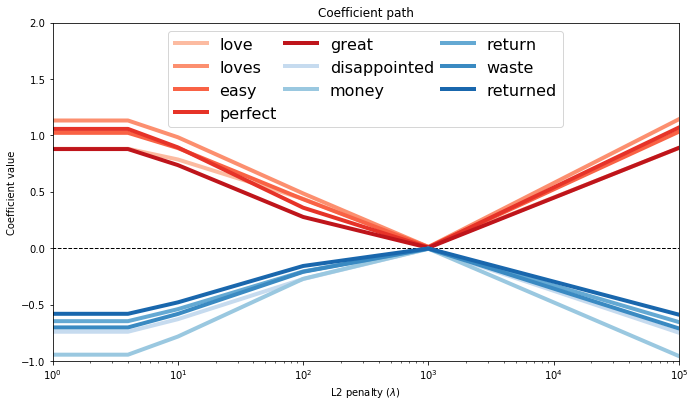

In [149]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 6

def make_coefficient_plot(table, positive_words, negative_words, l2_penalty_list):
    cmap_positive = plt.get_cmap('Reds')
    cmap_negative = plt.get_cmap('Blues')
    
    xx = l2_penalty_list
    plt.plot(xx, [0.]*len(xx), '--', lw=1, color='k')
    
    table_positive_words = table[table['word'].isin(positive_words)]
    table_negative_words = table[table['word'].isin(negative_words)]
    del table_positive_words['word']
    del table_negative_words['word']
    
    for i in range(len(positive_words)):
        color = cmap_positive(0.8*((i+1)/(len(positive_words)*1.2)+0.15))
        plt.plot(xx, table_positive_words[i:i+1].as_matrix().flatten(),
                 '-', label=positive_words[i], linewidth=4.0, color=color)
        
    for i in range(len(negative_words)):
        color = cmap_negative(0.8*((i+1)/(len(negative_words)*1.2)+0.15))
        plt.plot(xx, table_negative_words[i:i+1].as_matrix().flatten(),
                 '-', label=negative_words[i], linewidth=4.0, color=color)
        
    plt.legend(loc='best', ncol=3, prop={'size':16}, columnspacing=0.5)
    plt.axis([1, 1e5, -1, 2])
    plt.title('Coefficient path')
    plt.xlabel('L2 penalty ($\lambda$)')
    plt.ylabel('Coefficient value')
    plt.xscale('log')
    plt.rcParams.update({'font.size': 18})
    plt.tight_layout()


make_coefficient_plot(all_co_eff, positive_words, negative_words, l2_penalty_list=[0, 4, 10, 1e2, 1e3, 1e5])


In [197]:
def compute_score(feature_matrix,co_eff):
    product = np.dot(feature_matrix,co_eff)
    score = (product>0)
    return score    

In [198]:
indicator_train = (train_sentiment == +1)

In [213]:
train_data.shape[0]

42361

In [214]:
def accuracy(ind,pred,length):
    accuracy = np.count_nonzero(ind==pred)/length
    return accuracy

In [215]:
train_score_0 = compute_score(train_matrix,co_efficients_0_penalty)
train_accuracy_0 = accuracy(indicator_train,train_score_0,train_data.shape[0])

In [216]:
train_score_4 = compute_score(train_matrix,co_efficients_4_penalty)
train_accuracy_4 = accuracy(indicator_train,train_score_4,train_data.shape[0])

In [217]:
train_score_10 = compute_score(train_matrix,co_efficients_10_penalty)
train_accuracy_10 = accuracy(indicator_train,train_score_10,train_data.shape[0])

In [218]:
train_score_1e2 = compute_score(train_matrix,co_efficients_1e2_penalty)
train_accuracy_1e2 = accuracy(indicator_train,train_score_1e2,train_data.shape[0])

In [219]:
train_score_1e3 = compute_score(train_matrix,co_efficients_1e3_penalty)
train_accuracy_1e3 = accuracy(indicator_train,train_score_1e3,train_data.shape[0])

In [220]:
train_score_1e5 = compute_score(train_matrix,co_efficients_1e5_penalty)
train_accuracy_1e5 = accuracy(indicator_train,train_score_1e5,train_data.shape[0])

In [221]:
print(train_accuracy_0)
print(train_accuracy_4)
print(train_accuracy_10)
print(train_accuracy_1e2)
print(train_accuracy_1e3)
print(train_accuracy_1e5)

0.8021057104412077
0.8020821038219117
0.8020112839640235
0.8011850522886618
0.7907981397983995
0.7037369278345648


In [239]:
indicator_valid = (valid_sentiment == +1)

In [240]:
valid_score_0 = compute_score(valid_matrix,co_efficients_0_penalty)
valid_accuracy_0 = accuracy(indicator_valid,valid_score_0,valid_data.shape[0])
valid_score_4 = compute_score(valid_matrix,co_efficients_4_penalty)
valid_accuracy_4 = accuracy(indicator_valid,valid_score_4,valid_data.shape[0])
valid_score_10 = compute_score(valid_matrix,co_efficients_10_penalty)
valid_accuracy_10 = accuracy(indicator_valid,valid_score_10,valid_data.shape[0])
valid_score_1e2 = compute_score(valid_matrix,co_efficients_1e2_penalty)
valid_accuracy_1e2 = accuracy(indicator_valid,valid_score_1e2,valid_data.shape[0])
valid_score_1e3 = compute_score(valid_matrix,co_efficients_1e3_penalty)
valid_accuracy_1e3 = accuracy(indicator_valid,valid_score_1e3,valid_data.shape[0])
valid_score_1e5 = compute_score(valid_matrix,co_efficients_1e5_penalty)
valid_accuracy_1e5 = accuracy(indicator_valid,valid_score_1e5,valid_data.shape[0])

In [241]:
print(valid_accuracy_0)
print(valid_accuracy_4)
print(valid_accuracy_10)
print(valid_accuracy_1e2)
print(valid_accuracy_1e3)
print(valid_accuracy_1e5)

0.7956306600690879
0.7956306600690879
0.7954439361404164
0.7944169545327233
0.785547567920829
0.6901316403697134
